In [1]:
# moving XGBoost prediction code to own notebook

In [2]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor

import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [3]:
data_set = pd.read_csv("MultipleSources-2019-2025-Ascending.csv")
data_set.head()

,Date,SP500,Futures,Nikkei,FTSE,DAX
0,04/03/19,"2,873.40","2,879.75","21,713.21","7,418.28","11,954.40"
1,04/04/19,"2,879.39","2,882.75","21,724.95","7,401.94","11,988.01"
2,04/05/19,"2,892.74","2,896.00","21,807.50","7,446.87","12,009.75"
3,04/08/19,"2,895.77","2,898.25","21,761.65","7,451.89","11,963.40"
4,04/09/19,"2,878.20","2,882.50","21,802.59","7,425.57","11,850.57"


In [4]:
data_set.columns

data_set.tail()

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%m/%d/%y')

data_set.tail()

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()




Index(['Date', 'SP500', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

,Date,SP500,Futures,Nikkei,FTSE,DAX
1506,03/31/25,"5,611.85","5,653.25","35,617.56","8,582.81","22,163.49"
1507,04/01/25,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,04/02/25,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,04/03/25,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,04/04/25,"5,074.05","5,110.25",NaN,"8,054.98","20,641.72"


,Date,SP500,Futures,Nikkei,FTSE,DAX
1506,2025-03-31,"5,611.85","5,653.25","35,617.56","8,582.81","22,163.49"
1507,2025-04-01,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,2025-04-02,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,2025-04-03,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,2025-04-04,"5,074.05","5,110.25",NaN,"8,054.98","20,641.72"


,Date,SP500,Futures,Nikkei,FTSE,DAX
1506,1743379200,"5,611.85","5,653.25","35,617.56","8,582.81","22,163.49"
1507,1743465600,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,1743552000,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,1743638400,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,1743724800,"5,074.05","5,110.25",NaN,"8,054.98","20,641.72"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['SP500']), data_set['SP500'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,Date,Futures,Nikkei,FTSE,DAX
1495,1741910400,"5,692.25","37,053.10","8,632.33","22,986.82"
232,1583366400,"3,015.50","21,329.12","6,705.43","11,944.72"
830,1658275200,"3,962.50","27,680.26","7,264.31","13,281.98"
456,1611532800,"3,848.50","28,822.29","6,638.85","13,643.95"
1265,1712880000,"5,167.50","39,523.55","7,995.58","17,930.32"
...,...,...,...,...,...
70,1563148800,"3,017.25",NaN,"7,531.72","12,387.34"
132,1570665600,"2,941.00","21,551.98","7,186.36","12,164.20"
1313,1718928000,"5,471.89","38,596.47","8,237.72","18,163.52"
109,1567987200,"2,978.25","21,318.42","7,235.81","12,226.10"


,Date,Futures,Nikkei,FTSE,DAX
969,1675728000,"4,175.75","27,685.47","7,864.71","15,320.88"
721,1644451200,"4,497.50","27,696.08","7,672.40","15,490.44"
1271,1713744000,"5,047.50","37,438.61","8,023.87","17,860.80"
1234,1709078400,"5,081.00","39,208.03","7,624.98","17,601.22"
1407,1730678400,"5,743.25",NaN,"8,184.24","19,147.85"
...,...,...,...,...,...
1418,1731974400,"5,938.75","38,414.43","8,099.02","19,060.31"
1435,1734048000,"6,055.50","39,470.44","8,300.33","20,405.92"
1237,1709510400,"5,138.25","40,109.23","7,640.33","17,716.17"
501,1617062400,"3,947.75","29,432.70","6,772.12","15,008.61"


1495   5,638.94
232    3,023.94
830    3,959.90
456    3,855.36
1265   5,123.41
         ...   
70     3,014.30
132    2,938.13
1313   5,464.62
109    2,978.43
1504   5,693.31
Name: SP500, Length: 1208, dtype: float64

969    4,164.00
721    4,504.08
1271   5,010.60
1234   5,069.76
1407   5,712.69
         ...   
1418   5,916.98
1435   6,051.09
1237   5,130.95
501    3,958.55
296    3,193.93
Name: SP500, Length: 303, dtype: float64

In [6]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [7]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [8]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [9]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
xg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()
print(xg)

XGBmodel = model # for later use

,pred_spx,SP500
969,"4,159.93","4,164.00"
721,"4,479.68","4,504.08"
1271,"5,018.24","5,010.60"
1234,"5,060.10","5,069.76"
1407,"5,713.11","5,712.69"


Mean absolute error is 
7.278389445389856
0.0017529357041819553


1 day in seconds: 86400.0
lastdate: 1743724800.0
newdate 1743811200.0
lastdate: 1743811200.0
newdate 1743897600.0
lastdate: 1743897600.0
newdate 1743984000.0
lastdate: 1743984000.0
newdate 1744070400.0
lastdate: 1744070400.0
newdate 1744156800.0
lastdate: 1744156800.0
newdate 1744243200.0
lastdate: 1744243200.0
newdate 1744329600.0
Prediction Dates: [Timestamp('2025-04-05 00:00:00'), Timestamp('2025-04-06 00:00:00'), Timestamp('2025-04-07 00:00:00'), Timestamp('2025-04-08 00:00:00'), Timestamp('2025-04-09 00:00:00'), Timestamp('2025-04-10 00:00:00'), Timestamp('2025-04-11 00:00:00')]
Predictions: [np.float32(5074.207), np.float32(5074.207), np.float32(5074.207), np.float32(5072.0312), np.float32(5054.0996), np.float32(5019.379), np.float32(5019.379)]


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Predicted S&P 500 Closing Prices for Next 7 Days')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Predicted Close Price')

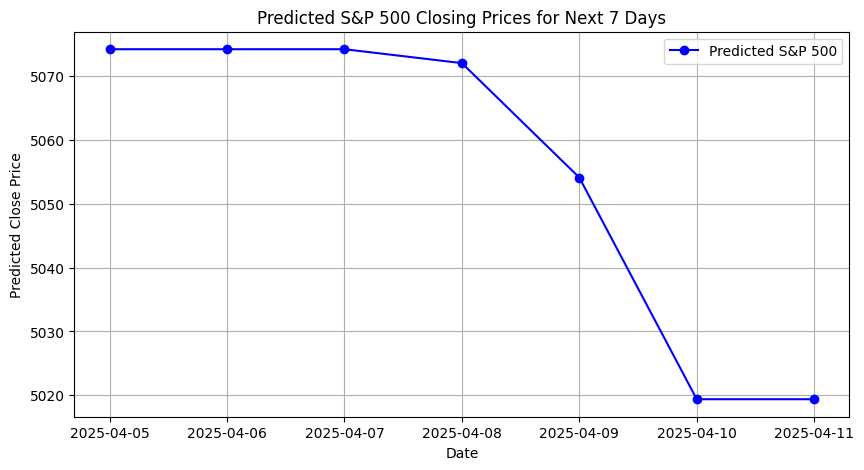

2025-04-05 00:00:00: $5074.21
2025-04-06 00:00:00: $5074.21
2025-04-07 00:00:00: $5074.21
2025-04-08 00:00:00: $5072.03
2025-04-09 00:00:00: $5054.10
2025-04-10 00:00:00: $5019.38
2025-04-11 00:00:00: $5019.38


In [10]:

# Feed last N rows into model, get predictions and use those values
# as input for future predictions
# using last 10 rows here
last_known = data_set.iloc[-10:].copy()
predictions = []
prediction_dates = []

# time is in SECONDS
single_day = pd.Timedelta('1day')
#print(f"1 day datetime: {single_day}")

#day_in_seconds = 86400
single_day = single_day.total_seconds()
print(f"1 day in seconds: {single_day}")

#lastdate = data_set.iloc[-1]['Date']
#print(f"last date: {lastdate}")

#print(f"next date: {single_day + lastdate}")


def downtrend(x, step=0.002, noise_scale=0.001):
    # take input index closing price and simulate a downward trend
    # with some variability. Use in predicting so features are changing
    trend = x * (1 - step)
    noise = x * np.random.normal(0, noise_scale)
    return trend + noise


# predicting 7 days ahead
for i in range(7):
    # take current last day
    prev_row = last_known.iloc[-1]

    input_df = pd.DataFrame([{
        'Date' : prev_row['Date'],
        #'SP500': prev_row['SP500'],
        'Futures': prev_row['Futures'],
        'Nikkei': prev_row['Nikkei'],
        'FTSE': prev_row['FTSE'],
        'DAX': prev_row['DAX']
    }])

    
    # create DMatrix for XGBoost 
    dmatrix_input = xgb.DMatrix(input_df)    
    pred = XGBmodel.predict(dmatrix_input)[0]
    predictions.append(pred)

    # get last date, currently in int64 ns since unix epoch
    # because that's what XGB will accept
    lastdate = prev_row['Date']
    print(f"lastdate: {lastdate}")
    # increase by 1 day
    new_date =  lastdate + single_day
    print(f"newdate {new_date}")
    prediction_dates.append(new_date)


    
    
    # Simulate new feature values
    new_row = pd.DataFrame({
        'Date' : new_date,
        #'SP500': [pred], 
        # add variability to other features by simulating changes
        # otherwise we'll just get the same predicted SP500 price again
        # using downtrend function
        'Futures': downtrend(prev_row['Futures']), 
        'Nikkei': downtrend(prev_row['Nikkei']), 
        'FTSE': downtrend(prev_row['FTSE']), 
        'DAX': downtrend(prev_row['DAX'])
    },index=[new_date])

    # Append the new prediction to last_known for the next iteration
    last_known = pd.concat([last_known, new_row])


# get readable dates back
#data_set['Date'] = pd.to_datetime(data_set['Date'], unit="s")
prediction_readable = []
for date in prediction_dates:
    prediction_readable.append(pd.to_datetime(date, unit="s"))
# data_set.set_index('Date', inplace=True)
#data_set.tail()

print(f"Prediction Dates: {prediction_readable}")
print(f"Predictions: {predictions}")

# Plot only the predicted S&P 500 prices
plt.figure(figsize=(10, 5))
plt.plot(prediction_readable, predictions, marker='o', linestyle='-', color='blue', label='Predicted S&P 500')
plt.title('Predicted S&P 500 Closing Prices for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Output predictions
for date, price in zip(prediction_readable, predictions):
    print(f"{date}: ${price:.2f}")
